In [1]:
import pandas as pd

# Read In Data
##### Look up and download data here:
https://www.kaggle.com/omermetinn/tweets-about-the-top-companies-from-2015-to-2020?select=Company_Tweet.csv 

In [2]:
import pandas as pd
IDs = pd.read_csv("../Company_Tweet.csv")
tweets=pd.read_csv("../Tweet.csv")

# Make Apple Dataframe

In [3]:
AppleOnly=tweets.copy()
tweets.head()

In [7]:
condition = IDs["ticker_symbol"] == "AAPL"
HasApple=IDs.tweet_id[condition]
test=set(HasApple)
ours =tweets.copy()
ours.drop(ours[~ours["tweet_id"].isin(test)].index, inplace=True)
ours = ours.reset_index(drop=True)
ours.head()

# Perform Sentiment Analysis

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

ours['compound'] = [analyzer.polarity_scores(x)['compound'] for x in ours['body']]
ours['scaled_sentiment'] = ours.compound /ours.compound.abs().max()


# Read Apple dataset 

In [16]:
stock_data=pd.read_csv("../AAPL.csv") 
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.745996,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,24.048862,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,24.051125,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.388374,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.325432,237458000


In [27]:
import datetime
def convert(time):
    return datetime.datetime.utcfromtimestamp(int(time)).strftime('%Y-%m-%d %H:%M:%S')

ours["date"] = [convert(x) for x in ours["post_date"]]

In [29]:
split = ours.date.str.split(expand=True)
ours["just_date"] = split[0]


0          2015-01-01
1          2015-01-01
2          2015-01-01
3          2015-01-01
4          2015-01-01
              ...    
1425008    2019-12-31
1425009    2019-12-31
1425010    2019-12-31
1425011    2019-12-31
1425012    2019-12-31
Name: just_date, Length: 1425013, dtype: object


In [105]:
grouped_df = ours.groupby(by = ["just_date"])
test = []
test_date = []
num_tweets = []
non_scaled_sentiment = []
for name,group in grouped_df:
    test.append(group.scaled_sentiment.mean())
    num_tweets.append(len(group.scaled_sentiment))
    test_date.append(name)
    non_scaled_sentiment.append(group.compound.mean())
    
stock_df = pd.DataFrame({"Date": test_date, "Mean_Sentiment": test, "Num_Tweets": num_tweets, "Non_Scaled_Sentiment":non_scaled_sentiment})
stock_df.head()

,Date,Mean_Sentiment,Num_Tweets,Non_Scaled_Sentiment
0,2015-01-01,0.146700,299,0.145556
1,2015-01-02,0.089360,867,0.088663
2,2015-01-03,0.239096,346,0.237232
3,2015-01-04,0.223525,406,0.221782
4,2015-01-05,0.144702,1147,0.143573


In [110]:
import numpy as np
stock_data["increased"] = np.where(stock_data["Close"]>stock_data["Open"], 1, 0)
stock_data["change_value"] = stock_data["Close"]-stock_data["Open"]
stock_data["carlosTest"] = stock_data["High"]-stock_data["Open"]
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,increased,change_value,carlosTest
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.745996,212818400,0,-0.515000,0.012501
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,24.048862,257142000,0,-0.510000,0.090000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,24.051125,263188400,0,-0.069999,0.222500
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.388374,160423600,1,0.137501,0.250000
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.325432,237458000,1,0.664999,0.729999
...,...,...,...,...,...,...,...,...,...,...
1253,2019-12-24,71.172501,71.222504,70.730003,71.067497,70.027306,48478800,0,-0.105004,0.050003
1254,2019-12-26,71.205002,72.495003,71.175003,72.477501,71.416664,93121200,1,1.272499,1.290001
1255,2019-12-27,72.779999,73.492500,72.029999,72.449997,71.389580,146266000,0,-0.330002,0.712501
1256,2019-12-30,72.364998,73.172501,71.305000,72.879997,71.813278,144114400,1,0.514999,0.807503


In [112]:
x = pd.merge(stock_data, stock_df, on="Date")
x

,Date,Open,High,Low,Close,Adj Close,Volume,increased,change_value,carlosTest,Mean_Sentiment,Num_Tweets,Non_Scaled_Sentiment
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.745996,212818400,0,-0.515000,0.012501,0.089360,867,0.088663
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,24.048862,257142000,0,-0.510000,0.090000,0.144702,1147,0.143573
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,24.051125,263188400,0,-0.069999,0.222500,0.156030,1190,0.154813
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.388374,160423600,1,0.137501,0.250000,0.153024,1094,0.151830
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.325432,237458000,1,0.664999,0.729999,0.170331,1495,0.169003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,2019-12-24,71.172501,71.222504,70.730003,71.067497,70.027306,48478800,0,-0.105004,0.050003,0.198996,352,0.197444
1251,2019-12-26,71.205002,72.495003,71.175003,72.477501,71.416664,93121200,1,1.272499,1.290001,0.175132,691,0.173766
1252,2019-12-27,72.779999,73.492500,72.029999,72.449997,71.389580,146266000,0,-0.330002,0.712501,0.169999,381,0.168673
1253,2019-12-30,72.364998,73.172501,71.305000,72.879997,71.813278,144114400,1,0.514999,0.807503,0.196787,732,0.195252


In [113]:
print(x["change_value"].corr(x["Non_Scaled_Sentiment"]))
print(x["High"].corr(x["Mean_Sentiment"]))
print(x["Num_Tweets"].corr(x["increased"]))
print(x["Mean_Sentiment"].corr(x["Num_Tweets"]))
print(x["Mean_Sentiment"].corr(x["carlosTest"]))

0.10590936071807246
0.5834317404946866
0.005291967582663046
-0.3751078133580381
0.21565070063254696


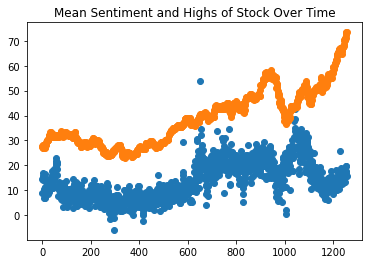

In [124]:
import matplotlib.pyplot as plt
#import math 

#max=np.max(x["High"])
#def sigmoid(x):
#      return x/max

#temp = [sigmoid(x) for x in x["High"]]
plt.title("Mean Sentiment and Highs of Stock Over Time")
plt.scatter(range(len(x)), x["Mean_Sentiment"]*100)
plt.scatter(range(len(x)), x["High"])
#plt.plot(range(len(x)), x["change_value"])
#plt.scatter(range(len(x)), temp)
#print(pd.Series(temp).corr(x["Mean_Sentiment"]))